/bin/bash: line 1: ./run_hyperfine.sh: Permission denied


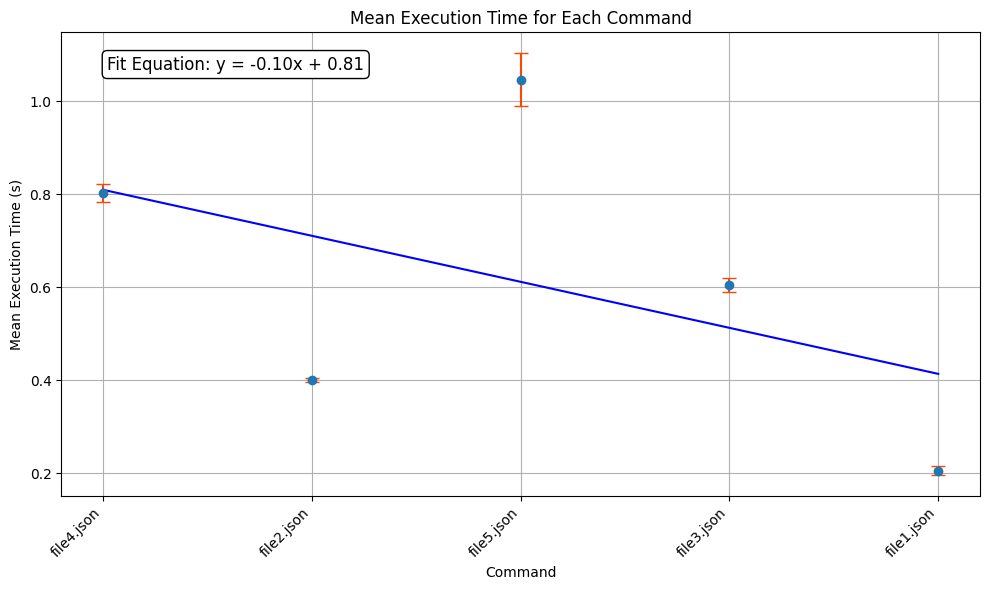

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

!./run_hyperfine.sh

# Path to the directory containing your results files
results_dir = 'results/'  # Update this to the path where your results are stored

# Use glob to match all json files in the results directory
json_files = glob.glob(os.path.join(results_dir, '*.json'))

# Initialize lists to hold means, standard deviations, and command names
means = []
stddevs = []
command_names = []

# Read each JSON file and extract the mean and standard deviation
for file_name in json_files:
    with open(file_name, 'r') as file:
        data = json.load(file)
        # Assuming each file contains results for a single command
        for result in data['results']:
            means.append(result['mean'])
            stddevs.append(result['stddev'])
            # Extract a command name or identifier from the command string
            command_name = os.path.basename(result['command']).split()[0]  # Adjust this as needed
            command_names.append(command_name)
            
# Numeric indices for commands
indices = np.arange(len(means))

# Fit a linear model to the data
a, b = np.polyfit(indices, means, 1)

# Generate the values for the fit line
fit_line = a * indices + b

# Plotting the means with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(command_names, means, yerr=stddevs, fmt='o', ecolor='orangered', capsize=5, linestyle='')
plt.title('Mean Execution Time for Each Command')
plt.xlabel('Command')
plt.ylabel('Mean Execution Time (s)')
plt.xticks(rotation=45, ha='right')  # Rotate the x labels to fit longer commands
plt.tight_layout()  # Adjust layout to fit
plt.plot(indices, fit_line, label=f'Fit Line (y = {a:.2f}x + {b:.2f})', color='blue')

plt.annotate(f'Fit Equation: y = {a:.2f}x + {b:.2f}',
             xy=(0.05, 0.95),
             xycoords='axes fraction',
             horizontalalignment='left',
             verticalalignment='top',
             fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))
plt.grid(True)
plt.show()
